In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

### W 를 직접 대입해주는 방법

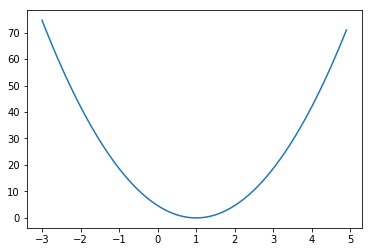

In [3]:
x=[1,2,3]
y=[1,2,3]

w=tf.placeholder(tf.float32)
# Our hypothesis for linear model x * w
hypothesis = w * x

#cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis-y))
#Launch the graph in a session
sess=tf.Session()
#Initializes global variables in the graph
sess.run(tf.global_variables_initializer())
#Variables for plotting cost function
w_val=[]
cost_val=[]
for i in range(-30,50):
    feed_w=i*0.1 # w를 -3에서 5까지 0.1 간격으로 움직이겠다.
    curr_cost, curr_w = sess.run([cost,w], feed_dict={w:feed_w})
    w_val.append(curr_w)
    cost_val.append(curr_cost)
    
# Show the cost function
plt.plot(w_val, cost_val) # w가 움직임에 따라 cost 가 어떻게 움직이는지 그래프를 그려보겠다.
plt.show() # hypothesis = w*x 의 cost function 의 그래프가 나옴
# 이 hypothesis cost function 은 'convex function'
    

### 미분을 통해 w를 조정하는 방법

In [ ]:
# 각 노드 생성

learning_rate=0.1
gradient=tf.reduce_mean((w*x-y)*x)
descent=w-learning_rate*gradient
update=w.assign(descent)   # w 에 descent 값을 할당하는 노드 => update
# 따라서 update를 실행하게 되면 꼬리에 꼬리를 물고 다 실행됨

#===

# Minimize : Gradient Descent Magic
optimizer=tf.train.GradientDescentOptimizer(leanring_rate=0.1)
train=optimizer.minimize(cost)

In [11]:
x_data=[1,2,3]
y_data=[1,2,3]

w=tf.Variable(tf.random_normal([1]), name="weight") # 1차원의 원소가 1개 있기 떄문에 이렇게 할당
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

# Our hypothesis for Linear model X * W
hypothesis = x*w

# cost/Loss function
cost=tf.reduce_mean(tf.square(hypothesis-y))

# MInimize : Gradient Descent using derivative: w-= Learning_rate * derivative
learning_rate=0.1
gradient=tf.reduce_mean((x*w-y)*x) #어차피 1/2m 이나 1/m 이나 최소를 만드는 w 는 같기 때문에 상관 없음.
descent = w-learning_rate*gradient
update=w.assign(descent)

#Launch the graph in a session 
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={x:x_data,y:y_data}) # update만 실행시켜도 되는게 어차피
#cost function 의 미분 방정식이 gradient 에서 다 선언되어 있기 때문에
#update 만 실행해도 cost 를 최소로 하는 w 의 값을 찾을 수 있음
    print(step, sess.run(cost,feed_dict={x:x_data,y:y_data}), sess.run(w))


0 1.2618803 [0.4799972]
1 0.35893488 [0.7226652]
2 0.102096975 [0.8520881]
3 0.029040938 [0.9211136]
4 0.008260552 [0.9579272]
5 0.002349673 [0.9775612]
6 0.000668348 [0.98803264]
7 0.00019010932 [0.9936174]
8 5.407354e-05 [0.996596]
9 1.5381267e-05 [0.9981845]
10 4.375401e-06 [0.9990317]
11 1.2445257e-06 [0.9994836]
12 3.5406188e-07 [0.99972457]
13 1.0065802e-07 [0.99985313]
14 2.8644484e-08 [0.9999217]
15 8.152082e-09 [0.9999582]
16 2.3137403e-09 [0.9999777]
17 6.6317324e-10 [0.9999881]
18 1.8905766e-10 [0.9999936]
19 5.4272437e-11 [0.9999966]
20 1.44998085e-11 [0.9999982]


In [8]:
# Minimize : Gradient Descent Magic
optimizer=tf.grain.GradientDescentOptimizer(leanring_rate=0.1)
train=optimizer.minimize(cost)

<tf.Variable 'weight_1:0' shape=(1,) dtype=float32_ref>


### Output when W=5

In [11]:
import tensorflow as tf
x=[1,2,3]
y=[2,3,4]

w=tf.Variable(-3.0)   # 변수는 tensorflow 가 훈련하면서 계속 바꾸는 값.
b=tf.Variable(5.0)   # 숫자만 넣으면 알아서 1차원 어레이로 생성해줌
# 5.0 이라는 실수로 선언해주어야 계속 학습하면서 그 값을 바꿀 수 있음
# w=tf.Variable(tf.float32)

hypothesis = x*w+b

cost=tf.reduce_mean(tf.square(hypothesis-y))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(101 ):
    if step%20==0: 
        print(step, sess.run([w,b]))
    sess.run(train)



0 [-3.0, 5.0]
20 [-0.3048715, 3.9662797]
40 [0.19792646, 2.8233018]
60 [0.50698435, 2.1207404]
80 [0.696955, 1.6888925]
100 [0.8137254, 1.4234459]


## Optional : *compute_gradient and apply gradient*

In [18]:
import tensorflow as tf
x=[1,2,3]
y=[2,3,4]

w=tf.Variable(-3.0)   # 변수는 tensorflow 가 훈련하면서 계속 바꾸는 값.


hypothesis = x*w

cost=tf.reduce_mean(tf.square(hypothesis-y))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1)

#수식적 gradient
gradient=tf.reduce_mean((w*x-y)*x)*2

#미리 만들어진 함수를 통해 얻어지는 graident
gvs = optimizer.compute_gradients(cost,[w]) #cost 함수에서의 그 때의 w에서의 gradients
#Apply gradients
apply_gradients=optimizer.apply_gradients(gvs) #모델을 통해서 계산된 gradients 를 다시 gradients에 적용
#cost 를 최소로 갖게하는 쪽으로 움직이는게 아닌 그냥 거기에서의 gradient 계산 후 다시 적용

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(101 ):

    print(step, sess.run([gradient,w,gvs]))
    sess.run(apply_gradients)

#수식적 gradient 와 텐서플로우의 gradient 가 같음

0 [-41.333332, -3.0, [(-41.333336, -3.0)]]
1 [-2.7555523, 1.1333337, [(-2.7555523, 1.1333337)]]
2 [-0.18370302, 1.4088889, [(-0.18370306, 1.4088889)]]
3 [-0.01224788, 1.4272592, [(-0.01224792, 1.4272592)]]
4 [-0.0008163452, 1.428484, [(-0.0008163452, 1.428484)]]
5 [-5.396207e-05, 1.4285656, [(-5.4001808e-05, 1.4285656)]]
6 [-3.6557515e-06, 1.428571, [(-3.695488e-06, 1.428571)]]
7 [-5.5631e-07, 1.4285713, [(-5.9604645e-07, 1.4285713)]]
8 [-1.5894572e-07, 1.4285715, [(-1.7881393e-07, 1.4285715)]]
9 [-1.5894572e-07, 1.4285715, [(-1.7881393e-07, 1.4285715)]]
10 [-1.5894572e-07, 1.4285715, [(-1.7881393e-07, 1.4285715)]]
11 [-1.5894572e-07, 1.4285715, [(-1.7881393e-07, 1.4285715)]]
12 [-1.5894572e-07, 1.4285715, [(-1.7881393e-07, 1.4285715)]]
13 [-1.5894572e-07, 1.4285715, [(-1.7881393e-07, 1.4285715)]]
14 [-1.5894572e-07, 1.4285715, [(-1.7881393e-07, 1.4285715)]]
15 [-1.5894572e-07, 1.4285715, [(-1.7881393e-07, 1.4285715)]]
16 [-1.5894572e-07, 1.4285715, [(-1.7881393e-07, 1.4285715)]]
17 [-